In [1]:
import numpy as np
import pandas as pd
import os
import json
import librosa
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf

import os

In [6]:
# Dataset location
source_path = r'C:\Users\jmdgo\Downloads\archive (9)\Data\genres_original'

# Sampling rate and total samples for 29 seconds of audio
sr = 22050
TOTAL_SAMPLES = 29 * sr

# Number of slices and samples per slice
NUM_SLICES = 10
SAMPLES_PER_SLICE = int(TOTAL_SAMPLES / NUM_SLICES)

# List of genres (classes)
genres = ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']

def preprocess_data(source_path, labels_path, mfcc_path):
    labels = []
    mfcc_list = []

    for i, (dirpath, dirnames, filenames) in enumerate(os.walk(source_path)):
        genre = os.path.basename(dirpath)
        if genre in genres:
            genre_index = genres.index(genre)
            print(f'Processing genre: {genre} (Index: {genre_index})')

            for file in filenames:
                file_path = os.path.join(dirpath, file)
                # Exclude a corrupted wav file that makes everything crash
                if file_path != r'C:\Users\jmdgo\Downloads\archive (9)\Data\genres_original\jazz\jazz.00054.wav':
                    print(f'Processing file: {file_path}')
                    song, sr = librosa.load(file_path, duration=29)
                    for s in range(NUM_SLICES):
                        start_sample = SAMPLES_PER_SLICE * s
                        end_sample = start_sample + SAMPLES_PER_SLICE
                        mfcc = librosa.feature.mfcc(y=song[start_sample:end_sample], sr=sr, n_mfcc=13)
                        mfcc = mfcc.T
                        labels.append(genre_index)
                        mfcc_list.append(mfcc)
                else:
                    print(f'Skipping corrupted file: {file_path}')
    
    if labels and mfcc_list:  # Ensure there is data to save
        labels = np.array(labels)
        mfcc_array = np.array(mfcc_list)

        np.save(labels_path, labels)
        np.save(mfcc_path, mfcc_array)
        print(f"Data preprocessing complete. Labels saved to {labels_path} and MFCCs saved to {mfcc_path}")
    else:
        print("No data to save. Please check the source path and files.")

# Define paths
labels_path = 'labels.npy'
mfcc_path = 'mfcc.npy'

# Ensure the paths are relative to the current notebook directory
current_dir = os.getcwd()
labels_path = os.path.join(current_dir, labels_path)
mfcc_path = os.path.join(current_dir, mfcc_path)

# Call the function
preprocess_data(source_path, labels_path, mfcc_path)

# Loading and displaying the saved data to verify
loaded_labels = np.load(labels_path)
loaded_mfcc = np.load(mfcc_path)

print(f"Loaded MFCC shape: {loaded_mfcc.shape}")
print(f"Loaded labels shape: {loaded_labels.shape}")


Processing genre: blues (Index: 0)
Processing file: C:\Users\jmdgo\Downloads\archive (9)\Data\genres_original\blues\blues.00000.wav
Processing file: C:\Users\jmdgo\Downloads\archive (9)\Data\genres_original\blues\blues.00001.wav
Processing file: C:\Users\jmdgo\Downloads\archive (9)\Data\genres_original\blues\blues.00002.wav
Processing file: C:\Users\jmdgo\Downloads\archive (9)\Data\genres_original\blues\blues.00003.wav
Processing file: C:\Users\jmdgo\Downloads\archive (9)\Data\genres_original\blues\blues.00004.wav
Processing file: C:\Users\jmdgo\Downloads\archive (9)\Data\genres_original\blues\blues.00005.wav
Processing file: C:\Users\jmdgo\Downloads\archive (9)\Data\genres_original\blues\blues.00006.wav
Processing file: C:\Users\jmdgo\Downloads\archive (9)\Data\genres_original\blues\blues.00007.wav
Processing file: C:\Users\jmdgo\Downloads\archive (9)\Data\genres_original\blues\blues.00008.wav
Processing file: C:\Users\jmdgo\Downloads\archive (9)\Data\genres_original\blues\blues.00009

Processing file: C:\Users\jmdgo\Downloads\archive (9)\Data\genres_original\blues\blues.00086.wav
Processing file: C:\Users\jmdgo\Downloads\archive (9)\Data\genres_original\blues\blues.00087.wav
Processing file: C:\Users\jmdgo\Downloads\archive (9)\Data\genres_original\blues\blues.00088.wav
Processing file: C:\Users\jmdgo\Downloads\archive (9)\Data\genres_original\blues\blues.00089.wav
Processing file: C:\Users\jmdgo\Downloads\archive (9)\Data\genres_original\blues\blues.00090.wav
Processing file: C:\Users\jmdgo\Downloads\archive (9)\Data\genres_original\blues\blues.00091.wav
Processing file: C:\Users\jmdgo\Downloads\archive (9)\Data\genres_original\blues\blues.00092.wav
Processing file: C:\Users\jmdgo\Downloads\archive (9)\Data\genres_original\blues\blues.00093.wav
Processing file: C:\Users\jmdgo\Downloads\archive (9)\Data\genres_original\blues\blues.00094.wav
Processing file: C:\Users\jmdgo\Downloads\archive (9)\Data\genres_original\blues\blues.00095.wav
Processing file: C:\Users\jmdg

Processing file: C:\Users\jmdgo\Downloads\archive (9)\Data\genres_original\classical\classical.00067.wav
Processing file: C:\Users\jmdgo\Downloads\archive (9)\Data\genres_original\classical\classical.00068.wav
Processing file: C:\Users\jmdgo\Downloads\archive (9)\Data\genres_original\classical\classical.00069.wav
Processing file: C:\Users\jmdgo\Downloads\archive (9)\Data\genres_original\classical\classical.00070.wav
Processing file: C:\Users\jmdgo\Downloads\archive (9)\Data\genres_original\classical\classical.00071.wav
Processing file: C:\Users\jmdgo\Downloads\archive (9)\Data\genres_original\classical\classical.00072.wav
Processing file: C:\Users\jmdgo\Downloads\archive (9)\Data\genres_original\classical\classical.00073.wav
Processing file: C:\Users\jmdgo\Downloads\archive (9)\Data\genres_original\classical\classical.00074.wav
Processing file: C:\Users\jmdgo\Downloads\archive (9)\Data\genres_original\classical\classical.00075.wav
Processing file: C:\Users\jmdgo\Downloads\archive (9)\D

Processing file: C:\Users\jmdgo\Downloads\archive (9)\Data\genres_original\country\country.00047.wav
Processing file: C:\Users\jmdgo\Downloads\archive (9)\Data\genres_original\country\country.00048.wav
Processing file: C:\Users\jmdgo\Downloads\archive (9)\Data\genres_original\country\country.00049.wav
Processing file: C:\Users\jmdgo\Downloads\archive (9)\Data\genres_original\country\country.00050.wav
Processing file: C:\Users\jmdgo\Downloads\archive (9)\Data\genres_original\country\country.00051.wav
Processing file: C:\Users\jmdgo\Downloads\archive (9)\Data\genres_original\country\country.00052.wav
Processing file: C:\Users\jmdgo\Downloads\archive (9)\Data\genres_original\country\country.00053.wav
Processing file: C:\Users\jmdgo\Downloads\archive (9)\Data\genres_original\country\country.00054.wav
Processing file: C:\Users\jmdgo\Downloads\archive (9)\Data\genres_original\country\country.00055.wav
Processing file: C:\Users\jmdgo\Downloads\archive (9)\Data\genres_original\country\country.

Processing file: C:\Users\jmdgo\Downloads\archive (9)\Data\genres_original\disco\disco.00031.wav
Processing file: C:\Users\jmdgo\Downloads\archive (9)\Data\genres_original\disco\disco.00032.wav
Processing file: C:\Users\jmdgo\Downloads\archive (9)\Data\genres_original\disco\disco.00033.wav
Processing file: C:\Users\jmdgo\Downloads\archive (9)\Data\genres_original\disco\disco.00034.wav
Processing file: C:\Users\jmdgo\Downloads\archive (9)\Data\genres_original\disco\disco.00035.wav
Processing file: C:\Users\jmdgo\Downloads\archive (9)\Data\genres_original\disco\disco.00036.wav
Processing file: C:\Users\jmdgo\Downloads\archive (9)\Data\genres_original\disco\disco.00037.wav
Processing file: C:\Users\jmdgo\Downloads\archive (9)\Data\genres_original\disco\disco.00038.wav
Processing file: C:\Users\jmdgo\Downloads\archive (9)\Data\genres_original\disco\disco.00039.wav
Processing file: C:\Users\jmdgo\Downloads\archive (9)\Data\genres_original\disco\disco.00040.wav
Processing file: C:\Users\jmdg

Processing file: C:\Users\jmdgo\Downloads\archive (9)\Data\genres_original\hiphop\hiphop.00017.wav
Processing file: C:\Users\jmdgo\Downloads\archive (9)\Data\genres_original\hiphop\hiphop.00018.wav
Processing file: C:\Users\jmdgo\Downloads\archive (9)\Data\genres_original\hiphop\hiphop.00019.wav
Processing file: C:\Users\jmdgo\Downloads\archive (9)\Data\genres_original\hiphop\hiphop.00020.wav
Processing file: C:\Users\jmdgo\Downloads\archive (9)\Data\genres_original\hiphop\hiphop.00021.wav
Processing file: C:\Users\jmdgo\Downloads\archive (9)\Data\genres_original\hiphop\hiphop.00022.wav
Processing file: C:\Users\jmdgo\Downloads\archive (9)\Data\genres_original\hiphop\hiphop.00023.wav
Processing file: C:\Users\jmdgo\Downloads\archive (9)\Data\genres_original\hiphop\hiphop.00024.wav
Processing file: C:\Users\jmdgo\Downloads\archive (9)\Data\genres_original\hiphop\hiphop.00025.wav
Processing file: C:\Users\jmdgo\Downloads\archive (9)\Data\genres_original\hiphop\hiphop.00026.wav
Processing

Processing file: C:\Users\jmdgo\Downloads\archive (9)\Data\genres_original\jazz\jazz.00001.wav
Processing file: C:\Users\jmdgo\Downloads\archive (9)\Data\genres_original\jazz\jazz.00002.wav
Processing file: C:\Users\jmdgo\Downloads\archive (9)\Data\genres_original\jazz\jazz.00003.wav
Processing file: C:\Users\jmdgo\Downloads\archive (9)\Data\genres_original\jazz\jazz.00004.wav
Processing file: C:\Users\jmdgo\Downloads\archive (9)\Data\genres_original\jazz\jazz.00005.wav
Processing file: C:\Users\jmdgo\Downloads\archive (9)\Data\genres_original\jazz\jazz.00006.wav
Processing file: C:\Users\jmdgo\Downloads\archive (9)\Data\genres_original\jazz\jazz.00007.wav
Processing file: C:\Users\jmdgo\Downloads\archive (9)\Data\genres_original\jazz\jazz.00008.wav
Processing file: C:\Users\jmdgo\Downloads\archive (9)\Data\genres_original\jazz\jazz.00009.wav
Processing file: C:\Users\jmdgo\Downloads\archive (9)\Data\genres_original\jazz\jazz.00010.wav
Processing file: C:\Users\jmdgo\Downloads\archive 

Processing file: C:\Users\jmdgo\Downloads\archive (9)\Data\genres_original\jazz\jazz.00089.wav
Processing file: C:\Users\jmdgo\Downloads\archive (9)\Data\genres_original\jazz\jazz.00090.wav
Processing file: C:\Users\jmdgo\Downloads\archive (9)\Data\genres_original\jazz\jazz.00091.wav
Processing file: C:\Users\jmdgo\Downloads\archive (9)\Data\genres_original\jazz\jazz.00092.wav
Processing file: C:\Users\jmdgo\Downloads\archive (9)\Data\genres_original\jazz\jazz.00093.wav
Processing file: C:\Users\jmdgo\Downloads\archive (9)\Data\genres_original\jazz\jazz.00094.wav
Processing file: C:\Users\jmdgo\Downloads\archive (9)\Data\genres_original\jazz\jazz.00095.wav
Processing file: C:\Users\jmdgo\Downloads\archive (9)\Data\genres_original\jazz\jazz.00096.wav
Processing file: C:\Users\jmdgo\Downloads\archive (9)\Data\genres_original\jazz\jazz.00097.wav
Processing file: C:\Users\jmdgo\Downloads\archive (9)\Data\genres_original\jazz\jazz.00098.wav
Processing file: C:\Users\jmdgo\Downloads\archive 

Processing file: C:\Users\jmdgo\Downloads\archive (9)\Data\genres_original\metal\metal.00074.wav
Processing file: C:\Users\jmdgo\Downloads\archive (9)\Data\genres_original\metal\metal.00075.wav
Processing file: C:\Users\jmdgo\Downloads\archive (9)\Data\genres_original\metal\metal.00076.wav
Processing file: C:\Users\jmdgo\Downloads\archive (9)\Data\genres_original\metal\metal.00077.wav
Processing file: C:\Users\jmdgo\Downloads\archive (9)\Data\genres_original\metal\metal.00078.wav
Processing file: C:\Users\jmdgo\Downloads\archive (9)\Data\genres_original\metal\metal.00079.wav
Processing file: C:\Users\jmdgo\Downloads\archive (9)\Data\genres_original\metal\metal.00080.wav
Processing file: C:\Users\jmdgo\Downloads\archive (9)\Data\genres_original\metal\metal.00081.wav
Processing file: C:\Users\jmdgo\Downloads\archive (9)\Data\genres_original\metal\metal.00082.wav
Processing file: C:\Users\jmdgo\Downloads\archive (9)\Data\genres_original\metal\metal.00083.wav
Processing file: C:\Users\jmdg

Processing file: C:\Users\jmdgo\Downloads\archive (9)\Data\genres_original\pop\pop.00063.wav
Processing file: C:\Users\jmdgo\Downloads\archive (9)\Data\genres_original\pop\pop.00064.wav
Processing file: C:\Users\jmdgo\Downloads\archive (9)\Data\genres_original\pop\pop.00065.wav
Processing file: C:\Users\jmdgo\Downloads\archive (9)\Data\genres_original\pop\pop.00066.wav
Processing file: C:\Users\jmdgo\Downloads\archive (9)\Data\genres_original\pop\pop.00067.wav
Processing file: C:\Users\jmdgo\Downloads\archive (9)\Data\genres_original\pop\pop.00068.wav
Processing file: C:\Users\jmdgo\Downloads\archive (9)\Data\genres_original\pop\pop.00069.wav
Processing file: C:\Users\jmdgo\Downloads\archive (9)\Data\genres_original\pop\pop.00070.wav
Processing file: C:\Users\jmdgo\Downloads\archive (9)\Data\genres_original\pop\pop.00071.wav
Processing file: C:\Users\jmdgo\Downloads\archive (9)\Data\genres_original\pop\pop.00072.wav
Processing file: C:\Users\jmdgo\Downloads\archive (9)\Data\genres_orig

Processing file: C:\Users\jmdgo\Downloads\archive (9)\Data\genres_original\reggae\reggae.00048.wav
Processing file: C:\Users\jmdgo\Downloads\archive (9)\Data\genres_original\reggae\reggae.00049.wav
Processing file: C:\Users\jmdgo\Downloads\archive (9)\Data\genres_original\reggae\reggae.00050.wav
Processing file: C:\Users\jmdgo\Downloads\archive (9)\Data\genres_original\reggae\reggae.00051.wav
Processing file: C:\Users\jmdgo\Downloads\archive (9)\Data\genres_original\reggae\reggae.00052.wav
Processing file: C:\Users\jmdgo\Downloads\archive (9)\Data\genres_original\reggae\reggae.00053.wav
Processing file: C:\Users\jmdgo\Downloads\archive (9)\Data\genres_original\reggae\reggae.00054.wav
Processing file: C:\Users\jmdgo\Downloads\archive (9)\Data\genres_original\reggae\reggae.00055.wav
Processing file: C:\Users\jmdgo\Downloads\archive (9)\Data\genres_original\reggae\reggae.00056.wav
Processing file: C:\Users\jmdgo\Downloads\archive (9)\Data\genres_original\reggae\reggae.00057.wav
Processing

Processing file: C:\Users\jmdgo\Downloads\archive (9)\Data\genres_original\rock\rock.00033.wav
Processing file: C:\Users\jmdgo\Downloads\archive (9)\Data\genres_original\rock\rock.00034.wav
Processing file: C:\Users\jmdgo\Downloads\archive (9)\Data\genres_original\rock\rock.00035.wav
Processing file: C:\Users\jmdgo\Downloads\archive (9)\Data\genres_original\rock\rock.00036.wav
Processing file: C:\Users\jmdgo\Downloads\archive (9)\Data\genres_original\rock\rock.00037.wav
Processing file: C:\Users\jmdgo\Downloads\archive (9)\Data\genres_original\rock\rock.00038.wav
Processing file: C:\Users\jmdgo\Downloads\archive (9)\Data\genres_original\rock\rock.00039.wav
Processing file: C:\Users\jmdgo\Downloads\archive (9)\Data\genres_original\rock\rock.00040.wav
Processing file: C:\Users\jmdgo\Downloads\archive (9)\Data\genres_original\rock\rock.00041.wav
Processing file: C:\Users\jmdgo\Downloads\archive (9)\Data\genres_original\rock\rock.00042.wav
Processing file: C:\Users\jmdgo\Downloads\archive 

In [13]:
# Function to prepare datasets
def prepare_datasets(inputs, targets, split_size=0.2):
    """
    Prepare datasets for training, validation, and testing.

    Parameters:
    inputs (numpy.ndarray): Input features (MFCCs), typically shape (num_samples, num_frames, num_mfcc).
    targets (numpy.ndarray): Target labels, typically shape (num_samples,).
    split_size (float): Size of the validation and test sets (default is 0.2).

    Returns:
    Tuple of numpy.ndarrays: inputs_train, inputs_val, inputs_test, targets_train, targets_val, targets_test
    """
    # Splitting the data into train, validation, and test sets
    inputs_train, inputs_temp, targets_train, targets_temp = train_test_split(inputs, targets, test_size=split_size, random_state=42)
    inputs_val, inputs_test, targets_val, targets_test = train_test_split(inputs_temp, targets_temp, test_size=0.5, random_state=42)
    
    # Reshaping inputs to be 3D
    inputs_train = inputs_train[..., np.newaxis]
    inputs_val = inputs_val[..., np.newaxis]
    inputs_test = inputs_test[..., np.newaxis]
    
    return inputs_train, inputs_val, inputs_test, targets_train, targets_val, targets_test

inputs = loaded_mfcc 
targets = loaded_labels 

Xtrain, Xval, Xtest, ytrain, yval, ytest = prepare_datasets(inputs, targets)

print(f"Train data shapes: {Xtrain.shape}, {ytrain.shape}")
print(f"Validation data shapes: {Xval.shape}, {yval.shape}")
print(f"Test data shapes: {Xtest.shape}, {ytest.shape}")

Train data shapes: (7992, 125, 13, 1), (7992,)
Validation data shapes: (999, 125, 13, 1), (999,)
Test data shapes: (999, 125, 13, 1), (999,)


In [14]:
def design_model(input_shape):
    model = tf.keras.models.Sequential([
        
        tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=input_shape),
        tf.keras.layers.MaxPooling2D((3,3), strides=(2,2), padding='same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D((3,3), strides=(2,2), padding='same'),
        tf.keras.layers.BatchNormalization(),
        
        tf.keras.layers.Conv2D(32, (2,2), activation='relu'),
        tf.keras.layers.MaxPooling2D((3,3), strides=(2,2), padding='same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.3),
        
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(64, activation='relu'), 
        tf.keras.layers.Dense(len(np.unique(targets)), activation='softmax')
    ])

    return model

In [15]:
def make_prediction(model, X, y, idx):
    
    genre_dict = {
        0 : "blues",
        1 : "classical",
        2 : "country",
        3 : "disco",
        4 : "hiphop",
        5 : "jazz",
        6 : "metal",
        7 : "pop",
        8 : "reggae",
        9 : "rock",
        }
        
    predictions = model.predict(X)
    genre = np.argmax(predictions[idx])
    
    print("\n---Now testing the model for one audio file---\nThe model predicts: {}, and ground truth is: {}.\n".format(genre_dict[genre], genre_dict[y[idx]]))

In [16]:
def plot_performance(hist):
    
    acc = hist.history['acc']
    val_acc = hist.history['val_acc']
    loss = hist.history['loss']
    val_loss = hist.history['val_loss']

    epochs = range(len(acc))

    plt.plot(epochs, acc, 'r', label='Training accuracy')
    plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.figure()

    plt.plot(epochs, loss, 'r', label='Training Loss')
    plt.plot(epochs, val_loss, 'b', label='Validation Loss')
    plt.title('Training and validation loss')
    plt.legend()

    plt.show()

In [17]:
input_shape = (Xtrain.shape[1], Xtrain.shape[2], 1) 

# Create the model
model = design_model(input_shape)

# Compile the model with RMSprop optimizer
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

# Print model summary
model.summary()

# Fit the model
history = model.fit(Xtrain, ytrain,
                    epochs=20,
                    batch_size=32,
                    validation_data=(Xval, yval))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 123, 11, 32)       320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 62, 6, 32)         0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 62, 6, 32)         128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 60, 4, 32)         9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 2, 32)         0         
 g2D)                                                            
                                                        

In [18]:
model.summary

<bound method Model.summary of <keras.src.engine.sequential.Sequential object at 0x000001DBC67E0950>>

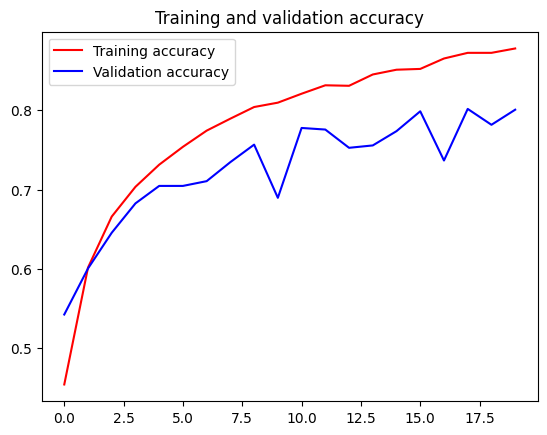

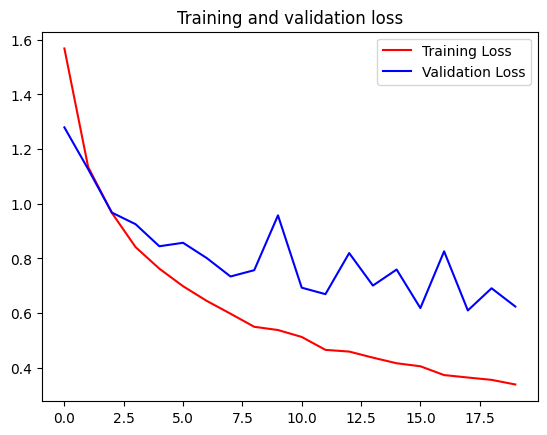

In [19]:
plot_performance(history)

In [48]:
def plot_history(hist):
    plt.figure(figsize=(20,15))
    fig, axs = plt.subplots(2)
    # accuracy subplot
    axs[0].plot(hist.history["acc"], label="train accuracy")
    axs[0].plot(hist.history["val_acc"], label="test accuracy")    
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")
    
    # Error subplot
    axs[1].plot(hist.history["loss"], label="train error")
    axs[1].plot(hist.history["val_loss"], label="test error")    
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")
    plt.tight_layout()
    plt.show()

Training accuracy: 0.8780030012130737
Test accuracy: 0.8008008003234863


<Figure size 2000x1500 with 0 Axes>

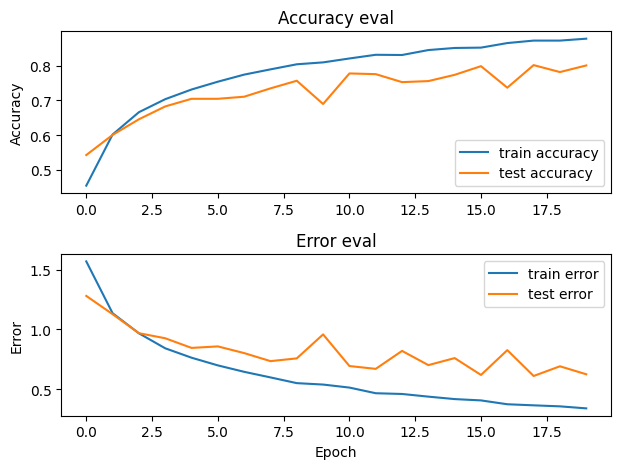

In [49]:
# Retrieve training and validation accuracy
train_accuracy = history.history['acc'][-1]  # Last epoch accuracy
test_accuracy = history.history['val_acc'][-1]  # Last epoch validation accuracy

# Print accuracies
print('Training accuracy:', train_accuracy)
print('Test accuracy:', test_accuracy)
plot_history(history)

In [25]:
make_prediction(model, Xtest, ytest, 80)

32/32 [==============================] - 0s 6ms/step

---Now testing the model for one audio file---
The model predicts: disco, and ground truth is: disco.



In [27]:
import pickle

# Save the model to a file
with open('Music Classification.pkl', 'wb') as file:
    pickle.dump(model, file)

In [41]:
# Load the model from the file
with open('Music Classification.pkl', 'rb') as file_new:
    model_new = pickle.load(file_new)

In [42]:
model_new.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 123, 11, 32)       320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 62, 6, 32)         0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 62, 6, 32)         128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 60, 4, 32)         9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 2, 32)         0         
 g2D)                                                            
                                                        

In [43]:
# Expected dimensions for the input
expected_height = 125
expected_width = 13

# Function to preprocess audio file
def preprocess_audio(file_path, sr=22050, duration=30, height=expected_height, width=expected_width):
    # Load the audio file
    audio, _ = librosa.load(file_path, sr=sr, duration=duration)
    
    # Ensure audio is the expected duration
    if len(audio) < sr * duration:
        audio = np.pad(audio, (0, max(0, sr * duration - len(audio))), 'constant')
    
    # Extract features (e.g., Mel spectrogram)
    mel_spec = librosa.feature.melspectrogram(y=audio, sr=sr, n_mels=height, fmax=8000)
    mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)
    
    # Reshape for resizing
    mel_spec_db = mel_spec_db[..., np.newaxis]  # Add channel dimension
    mel_spec_db = tf.image.resize(mel_spec_db, (height, width)).numpy()
    
    # Reshape for the model input
    mel_spec_db = mel_spec_db[np.newaxis, ..., np.newaxis]  # Add batch and channel dimensions
    return mel_spec_db

In [44]:
new_file = r"C:\Users\jmdgo\Downloads\archive (9)\Data\genres_original\hiphop\hiphop.00033.wav"
audio_data = preprocess_audio(new_file)

In [45]:
from IPython.display import Audio
# Display the audio player
Audio(new_file)

In [46]:
prediction = model_new.predict(audio_data)

1/1 [==============================] - 0s 134ms/step


In [47]:
predicted_class = np.argmax(prediction, axis=1)
print(f'Predicted class: {predicted_class}')

Predicted class: [7]


In [52]:
genre_dict = {
        0 : "blues",
        1 : "classical",
        2 : "country",
        3 : "disco",
        4 : "hiphop",
        5 : "jazz",
        6 : "metal",
        7 : "pop",
        8 : "reggae",
        9 : "rock",
        }

In [53]:
predicted_genre = [genre_dict[class_idx] for class_idx in predicted_class]

print(f'Predicted genres: {predicted_genre}')

Predicted genres: ['pop']
